In [1]:
import pandas as pd 
import numpy as np

# 字段简要说明：

userid： A unique number that identifies each player

version： Whether the player was put in the control group (gate_30 - a gate at level 30) 
or the group with the moved gate (gate_40 - a gate at level 40)

sum_gamerounds： The number of game rounds played by the player during the first 14 days after install

retention_1： Did the player come back and play 1 day after installing

retention_7： Did the player come back and play 7 days after installing

In [2]:
#cc：读取手游CookieCats表格文件信息
cc=pd.read_csv('mobile_games_CookieCats_ABTest.csv')
cc.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
#c1：计算userid字段是否有重复值及其数量，如果有再进行去重
c1=pd.DataFrame(cc['userid'].duplicated().value_counts())
c1.reset_index(drop=False,inplace=True)
c1.rename(columns={'index':'是否重复','userid':'数量'},inplace=True)
c1

,是否重复,数量
0,False,90189


In [4]:
#经检验非重复数值数量与原始数据集的总行数相等，故而可得出无重复数值这一结论，故无需进行去重操作
c1['数量'].loc[0]==cc.shape[0]

True

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

In [6]:
#新设“whether7days_played”字段，以0和1的形式存储表示7天内是否有游戏记录
whether7days_played=[]
for i in range(cc.shape[0]):
    if cc['retention_7'].loc[i]==True:
        whether7days_played.append('1')
    else:
        whether7days_played.append('0')
print(whether7days_played)

['0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',

In [7]:
p1=pd.DataFrame(whether7days_played)
p1=pd.DataFrame(p1,dtype=np.int64)
p1.rename(columns={0:'whether7days_played'},inplace=True)
p1.head()

,whether7days_played
0,0
1,0
2,0
3,0
4,1


In [8]:
c2=cc.join(p1,how='left')
c2.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7,whether7days_played
0,116,gate_30,3,False,False,0
1,337,gate_30,38,True,False,0
2,377,gate_40,165,True,False,0
3,483,gate_40,1,False,False,0
4,488,gate_40,179,True,True,1
5,540,gate_40,187,True,True,1
6,1066,gate_30,0,False,False,0
7,1444,gate_40,2,False,False,0
8,1574,gate_40,108,True,True,1
9,1587,gate_40,153,True,False,0


查看全体玩家7天内游戏登录在线率

In [9]:
c2['whether7days_played'].mean()

0.1860648194347426

查看gate_30组的7天内游戏登录在线率

In [10]:
c2.query("version=='gate_30'")['whether7days_played'].mean()

0.19020134228187918

查看gate_40组的7天内游戏登录在线率

In [11]:
c2.query("version=='gate_40'")['whether7days_played'].mean()

0.18200004396667327

————————————————————————————————————————————————————————————————————————————————

查看以上数据，目前并没有直接证据有效证明version的不同与7天内游戏是否登录在线有关

————————————————————————————————————————————————————————————————————————————————

# A/B TEST（样本量大于30，采用Z检验）
将‘version’字段与‘whether7days_played’字段进行结合比较

# 设定：Pg_30(gate_30组游戏在线率)，Pg_40(gate_40组游戏在线率)
给出对应零假设与备择假设：

# 零假设H0：Pg_30=Pg_40（gate_30组与gate_40组样本不存在显著性差异）

# 备择假设H1：Pg_30≠Pg_40（gate_30组与gate_40组样本存在显著性差异）

# α为第1类错误容许值，一般取0.05。当P值<α时，拒绝零假设，接受备择假设，认为两个样本存在显著性差异

In [12]:
#c3：按照version字段进行聚合计算出whether7days_played的平均值、标准差、样本数
c3=c2.groupby(by=['version'])['whether7days_played'].agg(["mean", "std", "count"])
c3

,mean,std,count
version,,,
gate_30,0.190201,0.392464,44700
gate_40,0.182000,0.385849,45489


In [13]:
#c4：统计整体数据，计算出whether7days_played的平均值、标准差、样本数
c4=c2['whether7days_played'].agg(["mean", "std", "count"])
c4=pd.DataFrame(c4).T
c4

,mean,std,count
whether7days_played,0.186065,0.389161,90189.0


In [14]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

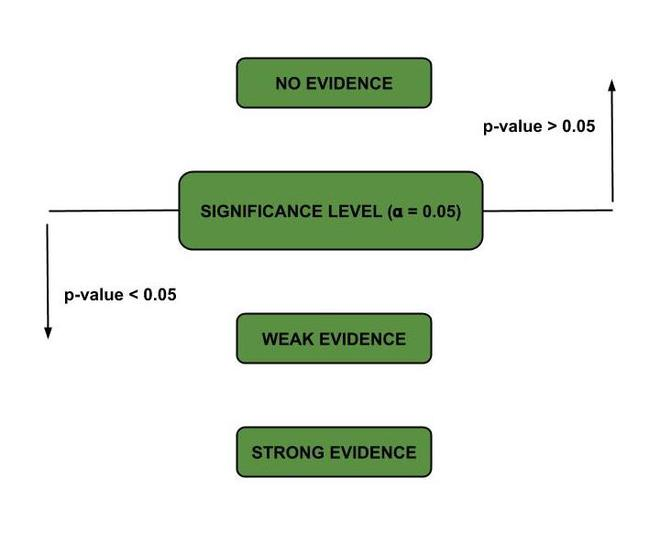

In [15]:
from IPython.display import Image
Image(filename='p-value.jpg')

In [16]:
#Pg_30：gate_30组游戏登录在线率
Pg_30=c2['whether7days_played'].mean()
Pg_30

0.1860648194347426

In [17]:
#Pg_40：gate_40组游戏登录在线率
Pg_40=c2['whether7days_played'].mean()
Pg_40

0.1860648194347426

In [18]:
#n_g30：gate_30组的玩家数量
n_g30=c2.query('version=="gate_30"')['userid'].count()
n_g30=int(n_g30)
n_g30

44700

In [19]:
#n_g40：gate_40组的玩家数量
n_g40=c2.query('version=="gate_40"')['userid'].count()
n_g40=int(n_g40)
n_g40

45489

In [20]:
import random
random.seed(42)

在零假设中，用Pg_30（gate_30组游戏登录在线率）模拟n_g30个玩家在线与否，并将其存储在g30_played中

★在本例中只有 0和 1 两种情况 所以用二项分布功能

In [21]:
g30_played=np.random.binomial(1,Pg_30,n_g30)
g30_played

array([0, 1, 0, ..., 0, 0, 0])

In [22]:
g30_played.shape[0]

44700

在零假设中，用Pg_40（gate_40组游戏登录在线率）模拟n_g40个玩家在线与否，并将其存储在g40_played中

★在本例中只有 0和 1 两种情况 所以用二项分布功能

In [23]:
g40_played=np.random.binomial(1,Pg_40,n_g40)
g40_played

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
g40_played.shape[0]

45489

★g30_played组有44700个数据，g40_played组有45489个数据，为了对比两组差异性，以个数少的组为准，调整g40_played取值范围直至两组个数相等

In [25]:
#计算Pg_30和Pg_40的差异值
g40_played=g40_played[:44700]
g40_played.mean()-g30_played.mean()

0.0005816554809843222

参考以上过程，模拟10000次Pg_30和Pg_40的差异值，并将其存储在P_diff中

In [26]:
P_diff=[]

for _ in range(10000):
    g30_played=np.random.binomial(1,Pg_30,n_g30)
    g40_played=np.random.binomial(1,Pg_40,n_g40)
    P_diff.append(g40_played.mean()-g30_played.mean())

用P_diff数据绘制hist直方图，从图形结果来看符合预期

C:\Users\86132\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


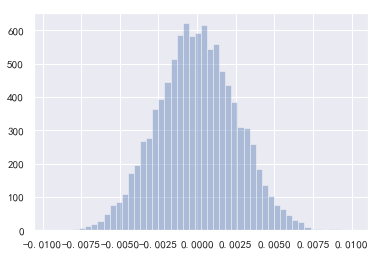

In [27]:
sns.distplot(P_diff, hist=True, kde=False)

plt.show()

在P_diff列表的数值中，求解大于c2中观察到的实际的7天游戏在线率差异的比例（即P值）

In [28]:
actual_diff=(c2[c2['version'] == "gate_40"]['whether7days_played'].mean()) - (c2[c2['version'] == "gate_30"]['whether7days_played'].mean())

actual_diff

-0.008201298315205913

In [29]:
P_diff=np.array(P_diff)
p_value=(P_diff>actual_diff).mean()
p_value

0.9996

In [30]:
#简要说明：

# actual_diff 实际差异 表示根据我们的数据，gate_30组和gate_40组的7天游戏在线率之间的差异。

# P-diff表示基于10000个模拟样本的gate_30组和gate_40组的7天游戏在线率的模拟差异。

# p_value在科学上称为p值，它确定了在原假设为真的情况下获得我们观察到的统计数据的概率。

# 经过计算，p_value远大于α值（0.05）

# 所以我们不能拒绝原假设

# 即version的不同与7天内是否游戏无关

————————————————————————————————————————————————————————————————————————————————

# 方法2：使用内置函数stats.proportions_ztest()来计算z分数与p值

# 检验与上一步得到的结论是否一致

————————————————————————————————————————————————————————————————————————————————

In [31]:
played_g30=sum(c2.query('version == "gate_30"')['whether7days_played'])
played_g40=sum(c2.query('version == "gate_40"')['whether7days_played'])
n_g30=c2.query('version=="gate_30"')['userid'].count()
n_g40=c2.query('version=="gate_40"')['userid'].count()
n_g30=int(n_g30)
n_g40=int(n_g40)

In [32]:
z_score, p_zhi = sm.stats.proportions_ztest([played_g40, played_g40], [n_g40, n_g30], alternative='larger')
print("Z分数是："+str(z_score))
print("P值是："+str(p_zhi))

Z分数是：-1.245920772601593
P值是：0.8936032584597475


# Z分数为负数，P值大于α，均表明我们不能拒绝原假设

# 即version的不同与7天内是否游戏无关（与上一步得到的结论一致）